# Data Science for Marketing Analytics
by: **Bima Putra Pratama**
_____

## Segmentasi Pelanggan Tahun 2010

Kali ini kita akan melakukan segmentasi pelanggan berdasarkan transaksi yang telah di lakukan pada tahun 2010

In [639]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")


# Define color for the seaborn visuals
C_Blue = '#2CBDFE'
C_Green = '#47DBCD'
C_Pink = '#F3A0F2'
C_Purple = '#9D2EC5'
C_Violet = '#661D98'
C_Amber = '#F5B14C'

color_list = [C_Blue, C_Green, C_Amber, C_Pink,
              C_Violet]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

### 1. Import Data

Data yang kita gunakan adalah data yang sudah kita siapkan di sesi sebelumnya yaitu transaksi_10_ready

In [635]:
# Import Dataset

## transaksi 2010
df_10 = pd.read_csv('output/transaksi_10_ready.csv')

In [636]:
# Pengecekan data
print('\n----- transaksi 2010 -----\n')
display(df_10.head())
display(df_10.info())


----- transaksi 2010 -----



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales,Cust_ID,Age,Gender
0,493446,10002,INFLATABLE POLITICAL GLOBE,3,2010-04-01 14:00:00,0.85,17807,United Kingdom,2.55,17807,31,FEMALE
1,493446,21004,ROSE DU SUD CHILDS APRON,2,2010-04-01 14:00:00,4.25,17807,United Kingdom,8.50,17807,31,FEMALE
2,507413,21080,SET/20 RED SPOTTY PAPER NAPKINS,2,2010-09-05 14:07:00,0.85,17807,United Kingdom,1.70,17807,31,FEMALE
3,493446,21181,PLEASE ONE PERSON METAL SIGN,1,2010-04-01 14:00:00,2.10,17807,United Kingdom,2.10,17807,31,FEMALE
4,493446,21198,WHITE HEART CONFETTI IN TUBE,1,2010-04-01 14:00:00,1.65,17807,United Kingdom,1.65,17807,31,FEMALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341870 entries, 0 to 341869
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      341870 non-null  int64  
 1   StockCode    341870 non-null  object 
 2   Description  341870 non-null  object 
 3   Quantity     341870 non-null  int64  
 4   InvoiceDate  341870 non-null  object 
 5   Price        341870 non-null  float64
 6   Customer ID  341870 non-null  int64  
 7   Country      341870 non-null  object 
 8   total_sales  341870 non-null  float64
 9   Cust_ID      341870 non-null  int64  
 10  Age          341870 non-null  int64  
 11  Gender       341870 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 31.3+ MB


None

### 2. Pemrosesan Data

Pada segemntasi kali ini kita harus menyiapkan data transaksi user. Di dunia marketing pola transaksi user yang sudah terbukti memberikan manfaar adalah nilai-nilai RFM dari tiap users. RFM ini terdiri dari tiga komponen yaitu:
- Recency : Kapan terakhir kali pelanggan melakukan transaksi
- Frequency : Berapa kali user melakukan transaksi
- Monetary : Berapa nilai transaksi user tiap kali user transaksi

Untuk mendapatkan nilai nilai tersebut kita perlu melakukan pemrosesan pada data kita.

#### Aggregasi Data

In [637]:
# Merubah tipe data
df_10['InvoiceDate'] = pd.to_datetime(df_10['InvoiceDate'])
df_10['Customer ID'] = df_10['Customer ID'].astype(str)

In [638]:
df_10.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales,Cust_ID,Age,Gender
0,493446,10002,INFLATABLE POLITICAL GLOBE,3,2010-04-01 14:00:00,0.85,17807,United Kingdom,2.55,17807,31,FEMALE
1,493446,21004,ROSE DU SUD CHILDS APRON,2,2010-04-01 14:00:00,4.25,17807,United Kingdom,8.50,17807,31,FEMALE
2,507413,21080,SET/20 RED SPOTTY PAPER NAPKINS,2,2010-09-05 14:07:00,0.85,17807,United Kingdom,1.70,17807,31,FEMALE
3,493446,21181,PLEASE ONE PERSON METAL SIGN,1,2010-04-01 14:00:00,2.10,17807,United Kingdom,2.10,17807,31,FEMALE
4,493446,21198,WHITE HEART CONFETTI IN TUBE,1,2010-04-01 14:00:00,1.65,17807,United Kingdom,1.65,17807,31,FEMALE


Langkah pertama kita akan melakukan agregasi terhadap data kita untuk mendapatkan transaksi tiap invoice dan customer setiap harinya.

In [641]:
# Membuat tanggal referensi untuk analisis
ref_date = max(df_10['InvoiceDate']) + datetime.timedelta(days=1)

print('Tannggal referensi kita adalah: {}'.format(ref_date.date()))

Tannggal referensi kita adalah: 2010-12-12


In [642]:
# Menambahkan kolom tanggal
df_10['Day'] = df_10['InvoiceDate'].dt.date

In [643]:
# Aggregasi data per invoice
df_10_inv = df_10.groupby(['Day','Invoice','Customer ID']).agg({'total_sales':'sum'})
df_10_inv = df_10_inv.reset_index()
df_10_inv

,Day,Invoice,Customer ID,total_sales
0,2010-01-02,496349,14739,435.32
1,2010-01-02,496351,14370,257.05
2,2010-01-02,496355,16684,730.08
3,2010-01-02,496356,14047,528.24
4,2010-01-02,496361,17969,107.90
...,...,...,...,...
16074,2010-12-11,532635,15856,1250.45
16075,2010-12-11,532638,18025,158.96
16076,2010-12-11,532639,14732,338.68
16077,2010-12-11,532641,13723,162.82


Selanjuutnya kita melakukan aggregasi tiap pelaggan agar mendapatkan nilai recency, frequency, dan monetary

In [647]:
# Aggregate data untuk tiap customer
customers_10 = df_10_inv.groupby(['Customer ID']).agg({
    'Day': lambda x: (ref_date.date()-x.max()).days,
    'Invoice':'count',
    'total_sales':'mean'
})

customers_10.rename(columns = {
    'Day':'Recency',
    'Invoice': 'Frequency',
    'total_sales':'Monetary'
}, inplace = True)

In [648]:
customers_10.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,167,2,84.680000
12608,42,1,415.790000
12745,65,2,361.925000
12746,178,1,254.550000
12747,26,13,311.425385


Langkah selanjutnya kita melakukan explorasi data untuk lebih mengetahui data kita

#### Statistik Deskriptif

In [652]:
customers_10.describe().round(2)

,Recency,Frequency,Monetary
count,3844.00,3844.00,3844.00
mean,92.83,4.18,354.52
std,89.69,6.87,425.25
min,1.00,1.00,1.55
25%,21.00,1.00,177.12
50%,58.00,2.00,279.81
75%,143.00,5.00,408.74
max,344.00,140.00,11880.84


#### Distribusi Data

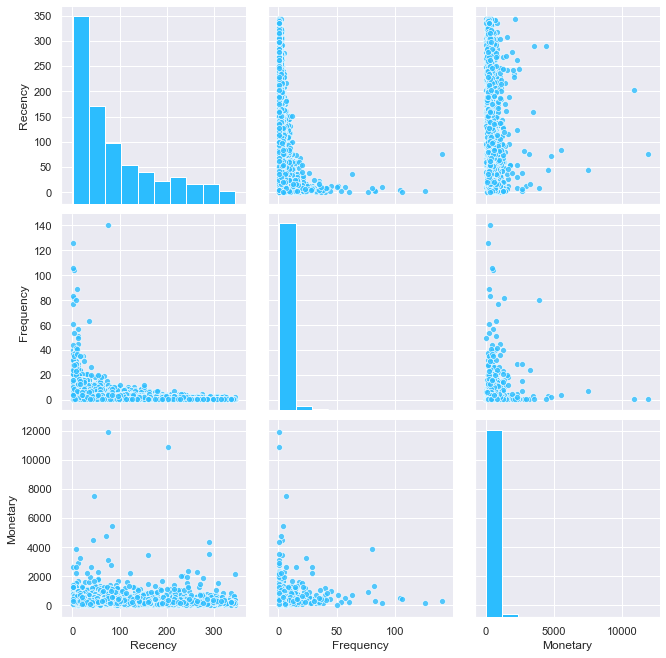

In [653]:
# Membuat pairplot untuk melihat korelasi dan distribusi data
sns.pairplot(customers_10,plot_kws = {'alpha': 0.8},height=3)

Dari hasil pairplot diatas, nilai frequency dan monetary kita condong berada di sebelah kiri. Hal ini harus kita antisipasi supaya hasil model yang kita dapatkan lebih optimal.

Untuk menangani hal ini kita akan melakukan transformasi log ke data kita.

In [654]:
log_customers_10 = np.log10(customers_10)
log_customers_10.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,2.222716,0.301030,1.927781
12608,1.623249,0.000000,2.618874
12745,1.812913,0.301030,2.558619
12746,2.250420,0.000000,2.405773
12747,1.414973,1.113943,2.493354


In [655]:
log_customers_10.describe()

,Recency,Frequency,Monetary
count,3844.000000,3844.000000,3844.000000
mean,1.697114,0.411695,2.432104
std,0.569467,0.385754,0.313187
min,0.000000,0.000000,0.190332
25%,1.322219,0.000000,2.248272
50%,1.763428,0.301030,2.446864
75%,2.155336,0.698970,2.611450
max,2.536558,2.146128,4.074847


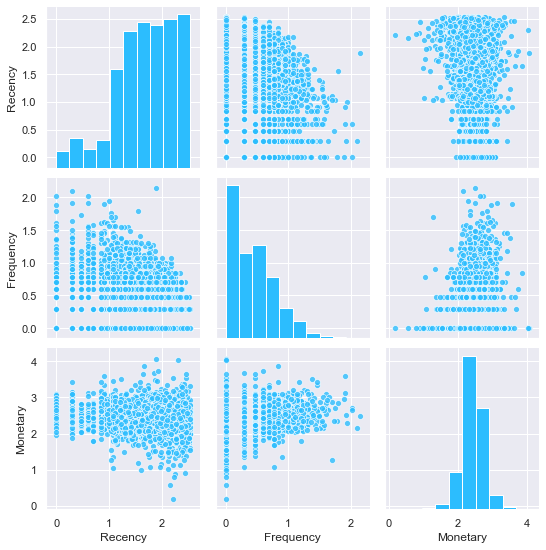

In [656]:
# Membuat pairplot untuk melihat korelasi dan distribusi data
sns.pairplot(log_customers_10,plot_kws = {'alpha': 0.8},height=2.5)

Pada eksperiment kali ini, kita akan menggunakan algoritma K-Means. Untuk mendapatkan hasil yang optimal, kita perlu melakukan standarisasi data kita supaya seluruh data memiliki skala yang sama. Hal ini disebabkan oleh algoritma K-Means akan menentukan cluster berdasarkan jarak antar titik ke titik yang lain.

In [719]:
# Import library
from sklearn.preprocessing import StandardScaler

# Inisialisasi object
scaler = StandardScaler()

# Fit and Transform data
scaler.fit(log_customers_10)
customers_std_10 = scaler.transform(log_customers_10)

# Merubah hasil standarisasi ke DataFrame
customers_std_10 = pd.DataFrame(customers_std,
                             index=log_customers_10.index,columns=log_customers_10.columns)

customers_std_10.rename(columns ={'Recency':'R_std',
                                  'Frequency':'F_std',
                                  'Monetary':'M_std'}, inplace = True )

customers_std_10.head()

,R_std,F_std,M_std
Customer ID,,,
12346,0.923092,-0.286918,-1.610501
12608,-0.129725,-1.067387,0.596430
12745,0.203373,-0.286918,0.404011
12746,0.971746,-1.067387,-0.084085
12747,-0.495511,1.820693,0.195596


Hasil dari standarisasi adalah kita akan memiliki mean 0 dan standard deviasi 1. Hal ini bisa kita pastikan dengan fungsi describe

In [659]:
customers_std_10.describe().round()

,R_std,F_std,M_std
count,3844.0,3844.0,3844.0
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-3.0,-1.0,-7.0
25%,-1.0,-1.0,-1.0
50%,0.0,-0.0,0.0
75%,1.0,1.0,1.0
max,1.0,4.0,5.0


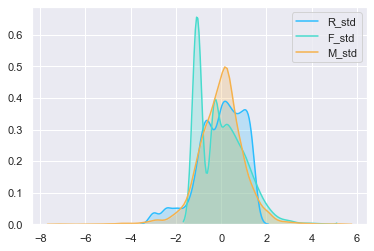

In [660]:
# Visualize normalized data with distplot
sns.kdeplot( customers_std_10["R_std"] , color=C_Blue,shade=True )
sns.kdeplot( customers_std_10["F_std"] , color=C_Green,shade=True)
sns.kdeplot( customers_std_10["M_std"] , color=C_Amber,shade=True)

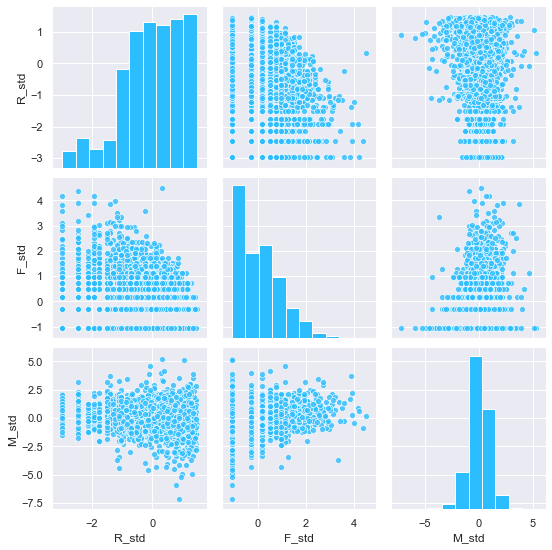

In [661]:
# Membuat pairplot untuk melihat korelasi dan distribusi data
sns.pairplot(customers_std_10,plot_kws = {'alpha': 0.8},height=2.5)

### 4. Data Modeling dan Evaluasi

Tahap awal dalam melakukan permodelan dengan K-Means ini adalah bagaimana kita bisa menentukan jumlah cluster yang paling optimal. Ada beberapa metode yang dapat digunakan untuk memilih jumlah cluster, salah satu yang populer adalah menggunakan elbow plot. Elbow plot akan memberikan gambaran berdasarkan nilai sum squared distance diantara data poin dan cluster central. Kita akan memilih nilai cluster dimana SSE mulai melandai dan membentuk siku.

In [662]:
# Menemukan jumlah cluster yang optimal

# Library
from sklearn.cluster import KMeans

# Membuat dictionary
sse_10 = {}
kmeans_10 = {}
labels_10 = {}
central_10 = {}

# Fit KMeans and calculate SSE for each k
for k in tqdm(range(1, 16)):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans_10[k] = KMeans(n_clusters=k, init = 'k-means++', random_state = 99).fit(customers_std_10)
    
    # Assign cluster results to dictionary
    sse_10[k] = kmeans_g[k].inertia_
    labels_10[k] = kmeans_10[k].labels_ 
    central_10[k] = kmeans_10[k].cluster_centers_

100%|██████████| 15/15 [00:03<00:00,  4.63it/s]


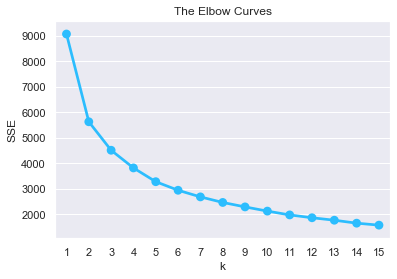


Sum Square Error:



,k,sse
0,1,9077.224583
1,2,5631.594421
2,3,4513.096676
3,4,3819.127125
4,5,3278.316259
5,6,2941.931628
6,7,2681.614193
7,8,2463.183038
8,9,2288.504476
9,10,2123.327254


In [663]:
# Plotting Elbow Curves

# Menambahkan judul dan nama axis
plt.title('The Elbow Curves'); plt.xlabel('k'); plt.ylabel('SSE')

# Melakukan plotting Sum Square Error
sns.pointplot(x=list(sse_10.keys()), y=list(sse_10.values()))
plt.show()

print('\nSum Square Error:\n')
df_sse = pd.DataFrame({'k':list(sse_10.keys()), 'sse':list(sse_10.values())})
display(df_sse)

Jumlah cluster yang kita pilih adalah cluster yang berada di siku dari elbow plot. Kondisi ini adalah di saat garis kurvanya mulai melandai.

jadi untuk data transaksi 2010 ini kita akan menggunakan K = 5

In [667]:
# Menambahkan cluster label ke dalam data
df_10_final = customers_std_10.assign(cluster = labels_10[5])

df_10_final.head()

,R_std,F_std,M_std,cluster
Customer ID,,,,
12346,0.923092,-0.286918,-1.610501,4
12608,-0.129725,-1.067387,0.596430,0
12745,0.203373,-0.286918,0.404011,0
12746,0.971746,-1.067387,-0.084085,0
12747,-0.495511,1.820693,0.195596,2


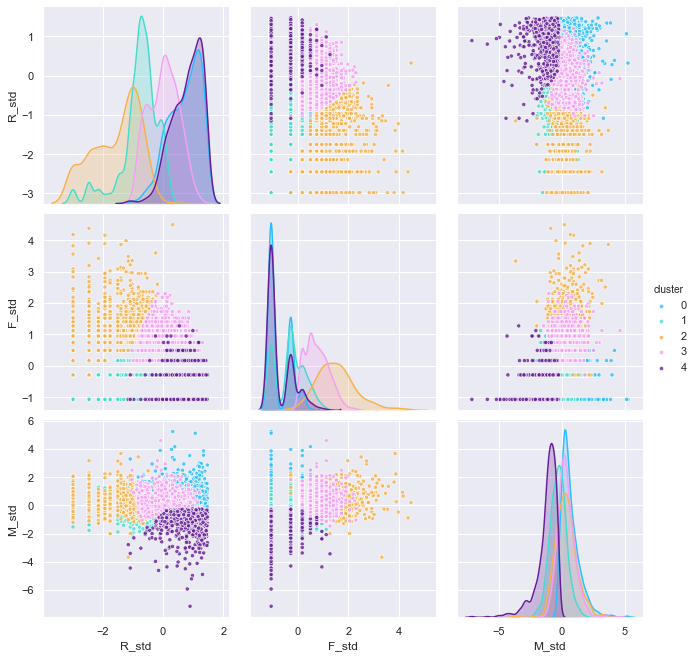

In [668]:
# Membuat pairplot untuk melihat korelasi dan distribusi data

sns.pairplot(df_10_final,plot_kws = {'alpha': 0.8, 'size':0.5},height=3,hue='cluster')

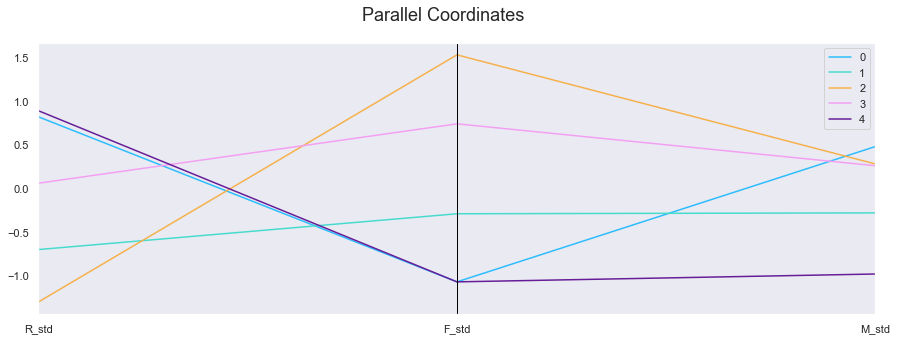

In [669]:
from pandas.plotting import parallel_coordinates

# Cluster Central by Mean
df_plot = df_10_final.groupby(['cluster']).median().round(2)

df_plot = df_plot.reset_index()

fig = plt.figure(figsize=(15, 5))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
# fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(df_plot, 
                         'cluster',
                          color = color_list
                          )

In [670]:
# Menggabungkan dengan data asli
df_10_join = df_10_final.merge(customers_10, how = 'inner', left_index = True, right_index = True)

# Mengambil output clusters
df_10_result = df_10_join[['Recency','Frequency','Monetary','cluster']]

In [671]:
# Nilai median dari tiap clusters
df_10_med_rfm = df_10_result.groupby(['cluster']).median().round(2)

df_10_med_rfm

,Recency,Frequency,Monetary
cluster,,,
0,145,1,382.28
1,20,2,221.27
2,9,10,332.01
3,54,5,326.90
4,159,1,133.21


In [630]:
grouped_df = df_10_result.groupby(['cluster'])
aggregate = grouped_df.agg({
    'Recency': ['count','min','mean','median','max','std'],
    'Frequency': ['min','mean','median','max','std'],
    'Monetary': ['min','mean','median','max','std']
  }).round(2)
aggregate.T

cluster                  0       1        2        3       4
Recency   count     951.00  684.00   511.00   923.00  775.00
          min        12.00    1.00     1.00    13.00   11.00
          mean      155.16   23.18    10.00    62.84  168.13
          median    145.00   20.00     9.00    54.00  159.00
          max       344.00   73.00    76.00   275.00  344.00
          std        88.46   14.33     8.19    41.18   88.04
Frequency min         1.00    1.00     2.00     2.00    1.00
          mean        1.46    2.21    13.45     5.55    1.53
          median      1.00    2.00    10.00     5.00    1.00
          max         4.00    7.00   140.00    20.00    8.00
          std         0.65    1.15    14.85     2.62    0.92
Monetary  min       220.44   57.80    19.12    94.19    1.55
          mean      542.06  245.13   418.60   395.18  130.26
          median    382.28  221.27   332.01   326.90  133.21
          max     11880.84  975.48  3851.98  7488.90  225.55
          std       676.17  122.43   356.96   327.70   52.53

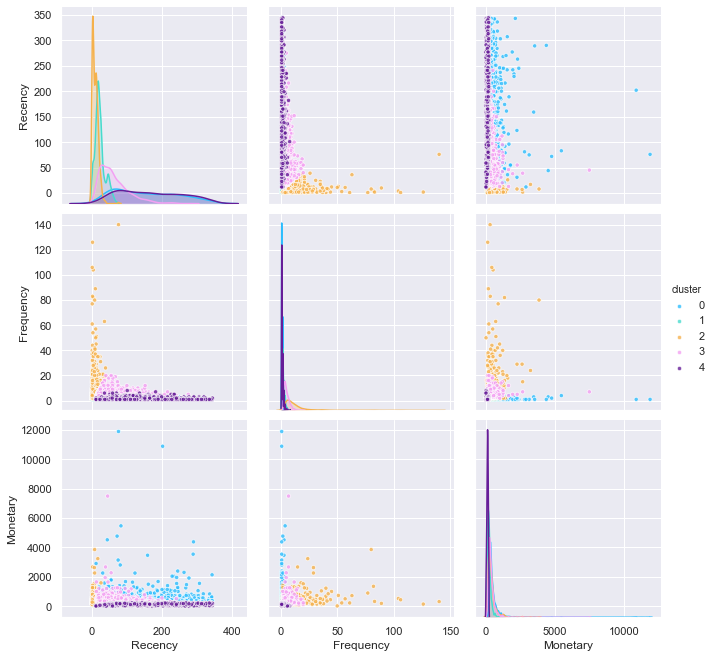

In [631]:
# Membuat pairplot untuk melihat korelasi dan distribusi data
sns.pairplot(df_10_result,plot_kws = {'alpha': 0.8, 'size':0.5},height=3,hue='cluster')

### 5. Penentuan Segmen Pelanggan

In [632]:
df_10_med_rfm

,Recency,Frequency,Monetary
cluster,,,
0,145,1,382.28
1,20,2,221.27
2,9,10,332.01
3,54,5,326.90
4,159,1,133.21


Dari hasil segmentasi kita kita mendapatkan 5 segment users:
- Cluster 0 -> Pelanggan yang lama tidak bertransaksi dan dengan nilai frequency rendah. Namun setiap kali transaksi di memiliki nilai transaksi yang tinggi (Potential Loss)
- Cluster 1 -> Pelanggan yang belum lama bertransaksi dan baru melakukan transaksi dalam jumlah yang sedikit (Potential)
- Cluster 2 -> Pelanggan yang aktif bertransaksi dan sering bertransaksi (Loyalist)
- Cluster 3 -> Pelanggan yang mulai berhenti bertransaksi setelah melakukan sejumlah transaksi (Churn)
- Cluster 4 -> Pelanggan yang lama tidak bertaransaksi dengan nilai frequency dan monetary yang rendah (Loss)

In [681]:
df_10_result['segments'] = df_10_result['cluster'].map({
    0.0: 'Potential Loss',
    1.0: 'Potential',
    2.0: 'Loyalist',
    3.0: 'Churn',
    4.0: 'Loss',
})

df_10_result['score'] = df_10_result['cluster'].map({
    0.0: 2,
    1.0: 4,
    2.0: 5,
    3.0: 3,
    4.0: 1
})

/Users/pratamab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pratamab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


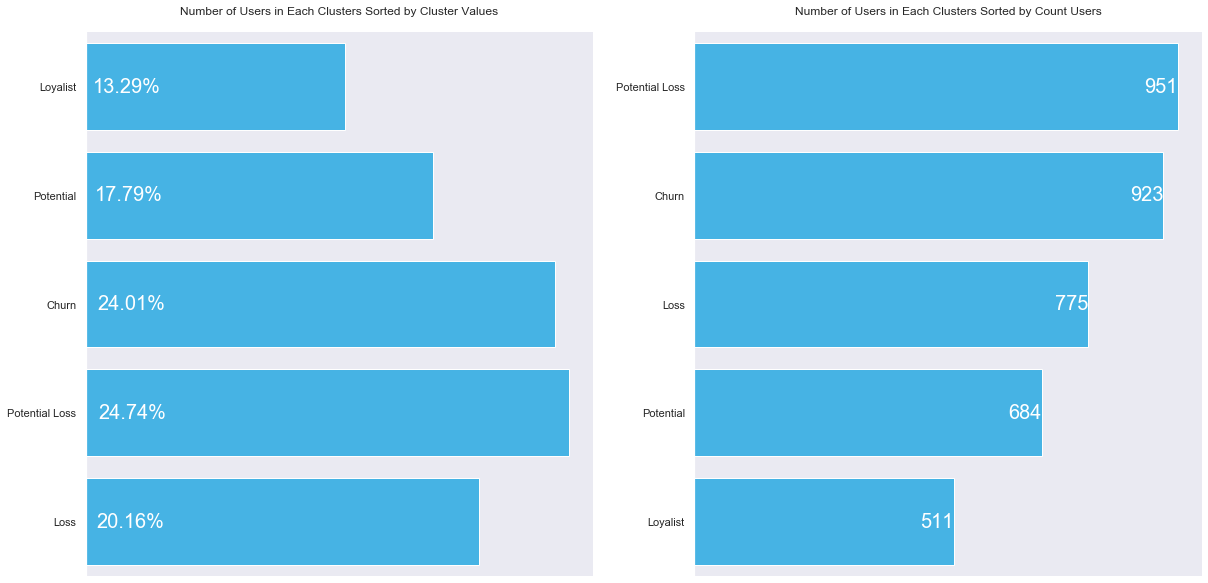

In [712]:
f, ax = plt.subplots(1,2, figsize=(20, 10))

# Chart Berdasarkan Level Cluster
g = sns.barplot(x = df_10_result['segments'].value_counts(), 
                y = df_10_result['segments'].value_counts().index , 
                order = ['Loyalist','Potential','Churn','Potential Loss','Loss'], 
                color = C_Blue,
                ax = ax[0])

# Chart Berdasarkan jumlah pelanggan
g = sns.barplot(x = df_10_result['segments'].value_counts(), 
                y = df_10_result['segments'].value_counts().index , 
                color = C_Blue,
                ax = ax[1])

# Menambahkan Judul
ax[0].set(title = 'Number of Users in Each Clusters Sorted by Cluster Values\n',
          xlabel = '',
          xticks = ([]))

ax[1].set(title = 'Number of Users in Each Clusters Sorted by Count Users\n',
          xlabel = '',
          xticks = ([]))

sns.despine(right=True, bottom=True,top = True)


# Add Label
labels = df_10_result['segments'].value_counts().index

X_1 = df_10_result['segments'].value_counts(sort = False, normalize = True)*100
X_1 = X_1.reindex(['Loyalist','Potential','Churn','Potential Loss','Loss'])
X_2 = df_10_result['segments'].value_counts()


for n, i in enumerate(labels):
    #Create an axis text object
    ax[0].text(X_1[n]-0.003, # X location of text (with adjustment)
            n, # Y location
            s=f'{round(X_1[n],2):,}%', #Required label with formatting
            va='center', #Vertical alignment
            ha='left', #Horizontal alignment
            color='white', #Font colour and size
            fontsize=20)
    ax[1].text(X_2[n]-0.1, # X location of text (with adjustment)
            n, # Y location
            s=f'{round(X_2[n],2):,}', #Required label with formatting
            va='center', #Vertical alignment
            ha='right', #Horizontal alignment
            color='white', #Font colour and size
            fontsize=20)


In [718]:
# Simpan hasil segmentasi 2010
df_10_result.to_csv('output/user_segment_10.csv', index = False)

### 7. Kesimpulan

Dari hasil permodelan kita, kali ini kita mengetahui pelanggan kita terbagi menjadi 5 segmen.

| Cluster   | Segmen         | Deskripsi                                                                                                                                     | Score |
|-----------|----------------|-----------------------------------------------------------------------------------------------------------------------------------------------|-------|
| Cluster 0 | Potential Loss | Pelanggan yang lama tidak bertransaksi dan dengan nilai frequency rendah. Namun setiap kali transaksi di memiliki nilai transaksi yang tinngi | 2|
| Cluster 1 | Potential Loss | Pelanggan yang belum lama bertransaksi dan baru melakukan transaksi dalam jumlah yang sedikit (Potential)                                     |4|
| Cluster 2 | Loyalist       | Pelanggan yang aktif bertransaksi dan sering bertransaksi (Loyalist)                                                                          |5|
| Cluster 3 | Churn          | Pelanggan yang mulai berhenti bertransaksi setelah melakukan sejumlah transaksi (Churn)                                                       |3|
| Cluster 4 | Loss           | Pelanggan yang lama tidak bertaransaksi dengan nilai frequency dan monetary yang rendah (Loss)                                                |1|


In [723]:
# Nilai median dari tiap segmen
df_10_med_rfm = df_11_result.groupby(['segments']).median().round(2).sort_values('score', ascending = False)

df_10_med_rfm

,Recency,Frequency,Monetary,cluster,score
segments,,,,,
Loyalist,9,10,332.01,2,5
Potential,20,2,221.27,1,4
Churn,54,5,326.90,3,3
Potential Loss,145,1,382.28,0,2
Loss,159,1,133.21,4,1
